# __Finance 5330 Lecture Notes: Homework Problem 2 Solution__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: March 18, 2020 <br>
<br>
<br>


In [1]:
import PyPlot; const plt = PyPlot

PyPlot

Simulate an $AR(1)$ process with parameter $\phi = 0.8$ by using the $MA(\infty)$ representation.

__Hint:__ you will have to truncate the $MA(\infty)$ representation, yielding an approximation to the $AR(1)$. 

Recall that the $AR(1)$ can be represented by the following (i.e. the $MA(\infty)$ representation):

<br>

$$
y_{t} = y_{0} + \sum\limits_{j=0}^{\infty} \phi^{j} \varepsilon_{t-j}
$$

<br>

For simplicity, let's set $y_{0} = 0.0$. 

<br>

__Mathematical Side Note on the Dot Product__

<br>

The ___dot product___ of two vectors $a = [a_{1}, a_{2}, \ldots, a_{n}]$ and $b = [b_{1}, b_{2}, \ldots, b_{n} ]$ is given by the following:

<br>

$$
a \boldsymbol{\cdot} b = \sum_{i=1}^{n} a_{i} \boldsymbol{\cdot} b_{i} = a_{1} b_{1} + a_{2} b_{2} + \cdots + a_{n} b_{n}
$$

<br>

So for example, for the following this is as follows. Let's say we are given two vectors: 

$$
\begin{aligned}
a &= [1, 3, -5] \quad \mbox{ and } \\
b &= [4, -2, -1] 
\end{aligned}
$$

<br>

Then their dot product will be the following:

<br>

$$
\begin{aligned}
\left[1, 3, -5\right] \boldsymbol{\cdot} [4, -2, -1] &= (1 \times 4) + (3 \times -2) + (-5 \times -1) \\
                                &= 4 - 6 + 5 \\
                                &= 3
\end{aligned}
$$

<br>

There is a `dot` function in the `LinearAlgebra` package that will do this for us in Julia.

<br>

In [2]:
using LinearAlgebra

In [3]:
a = [1, 3, -5]
b = [4, -2, -1]
dot(a, b)

3

__Back to the AR(1) Simulation__

<br>

We have to choose a truncation point for our analysis. Let's say we choose 30 lags. Then, the $AR(1)$ becomes a finite $MA(\tau)$ model where $\tau$ represents the truncation. 

<br>

$$
\begin{aligned}
y_{t} &= \sum\limits_{j=0}^{\tau} \phi^{j} \bullet \varepsilon_{t-j} \\
      &= (\phi^{0} \times \varepsilon_{t-0}) + (\phi^{1} \times \varepsilon_{t-1}) + \cdots + (\phi^{\tau} \times \varepsilon_{t-\tau})
\end{aligned}
$$

<br>

We notice that the summation can be done as a dot product. Now we can write a Julia function to do the simulation.

<br>

In [4]:
function simulate_ar1(ϕ::AbstractFloat, τ::Int, length::Int)
    θ = zeros(τ)
    y = zeros(length)
    
    θ = ϕ.^Vector(0:τ)
    
    for t in 1:length
        ε = randn(τ+1)
        y[t] = dot(θ, ε)
    end
    
    return y
end

simulate_ar1 (generic function with 1 method)

In [13]:
y = simulate_ar1(.3, 30, 250);

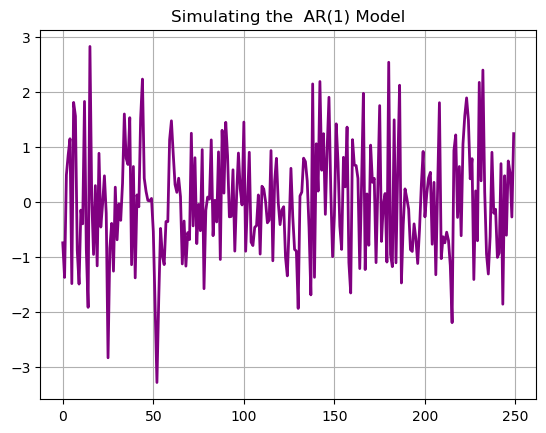

PyObject Text(0.5, 1, 'Simulating the  AR(1) Model')

In [14]:
plt.grid(true)
plt.plot(y, linewidth=2, color="purple")
plt.title("Simulating the  AR(1) Model")